In [13]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
# Define the URL of the dataset
dataset_url = "https://raw.githubusercontent.com/fdwsc2005/Insurance_claim_prediction/master/train.csv"

# Load the dataset
df = pd.read_csv(dataset_url)

In [15]:
# Create copies of both data sets

df_copy = df.copy()

In [16]:
# Display the shape of the DataFrame
print("\nShape:")
print(df_copy.shape)


Shape:
(58592, 44)


In [17]:
# Display all columns
pd.set_option('display.max_columns', None)

In [18]:
# Display the first few rows
print("Head of the DataFrame:")
df_copy.head()

Head of the DataFrame:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [19]:
# Display DataFrame information
print("\nDataFrame Info:")
df_copy.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  

In [20]:
# Display summary statistics
print("\nDataFrame Describe:")
df_copy.describe()


DataFrame Describe:


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [21]:
# Display column names
print("\nColumn Names:")
print(df_copy.columns)


Column Names:
Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')


In [22]:
# Count null values in each column
print("\nNull Value Counts:")
print(df_copy.isnull().sum())


Null Value Counts:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                

In [23]:
# Count duplicated rows
print("\nDuplicated Rows Count:")
print(df_copy.duplicated().sum())


Duplicated Rows Count:
0


In [24]:
# Count the different classes in the target variable
class_counts = df_copy['is_claim'].value_counts()
print(class_counts)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [25]:
# Calculate the imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]

print("Imbalance Ratio (Class 0 to Class 1): {:.2f}".format(imbalance_ratio))

Imbalance Ratio (Class 0 to Class 1): 14.63


The majority class (Class 0) has approximately 14.63 times more instances than the minority class (Class 1).

In [26]:
def create_count_plot(data, x_col, hue_col, title):
    # Define the neon_palette
    neon_palette = ["#faeb2c", "#f52789", "#e900ff", "#1685f8", "#3d144c"]

    # Create the count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
    ax.set_facecolor('#F6F5F4')
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel(x_col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    ax.grid(True, linestyle='--', alpha=0.5)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

    # Adding percentage annotations
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f}%'.format((height / total) * 100),
                ha="center", fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_17850/215999743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
/tmp/ipykernel_17850/215999743.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)


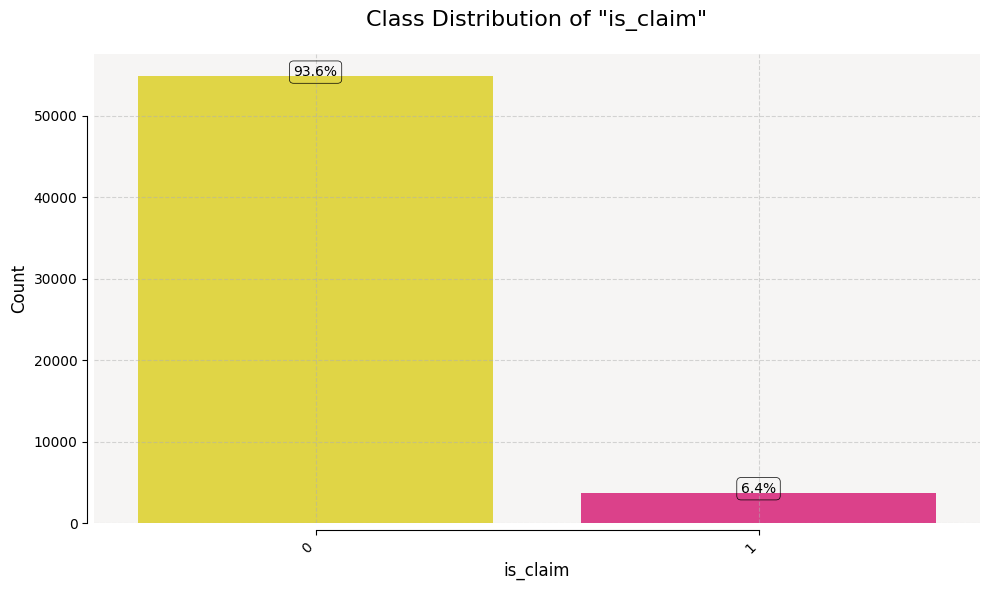

In [27]:
#Count plot for target variable
create_count_plot(df_copy, x_col='is_claim', hue_col=None, title='Class Distribution of "is_claim"')

We already know there is an imbalance but here is a visual representation.

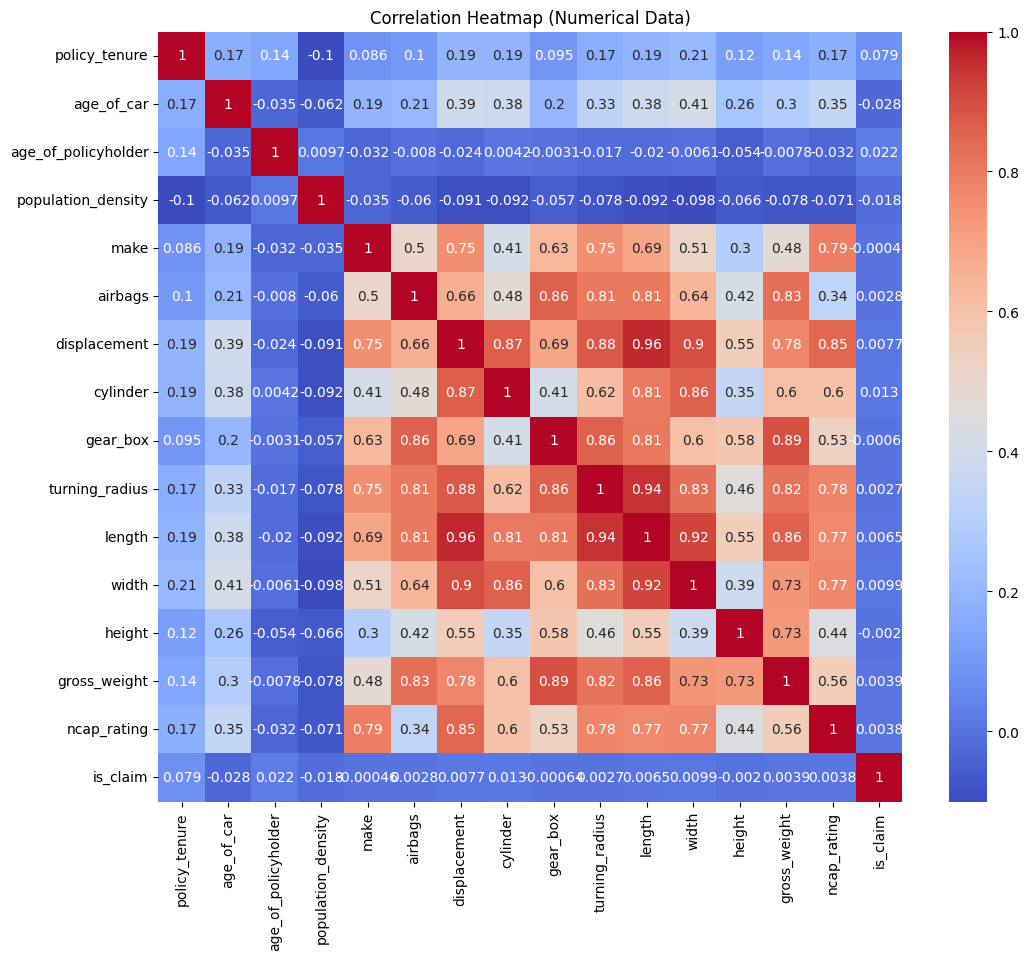

In [28]:
def plot_heatmap_numerical(data):
    # Select only numerical columns from the DataFrame
    numerical_data = data.select_dtypes(include=['number'])

    # Compute the correlation matrix for numerical data
    corr_matrix = numerical_data.corr()

    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Numerical Data)')
    plt.show()

# Example usage:
plot_heatmap_numerical(df_copy)

Cylinder has a strong positive correlation with displacement (0.8662), suggesting that as the number of cylinders increases, engine displacement also increases linearly.

In [29]:
# Define the neon_palette
neon_palette = ["#faeb2c", "#f52789", "#e900ff", "#1685f8", "#3d144c"]

def plot_histogram(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplots_numerical(data):
    # Select only numerical columns from the DataFrame
    numerical_data = data.select_dtypes(include=['number'])

    num_cols = numerical_data.shape[1]
    num_rows = (num_cols - 1) // 3 + 1  # 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(14, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical_data.columns):
        row_idx = i // 3
        col_idx = i % 3
        ax = axes[row_idx, col_idx]
        
        sns.boxplot(x=numerical_data[column], ax=ax)
        ax.set_title(f'Box Plot of {column}')
        ax.set_xlabel(column)

    # Remove empty subplots
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

def plot_bar_chart(data, column, palette=neon_palette):
    plt.figure(figsize=(8, 6))
    
    # Set the custom palette if provided
    if palette is not None:
        sns.set_palette(palette)
    
    sns.countplot(x=column, data=data)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_scatter(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(f'Scatter Plot between {x_column} and {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def plot_pairplot(data, columns):
    sns.pairplot(data[columns])
    plt.show()
    
def plot_violinplot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.title(f'Violin Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def plot_stackedbar(data, x_column, hue_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x_column, hue=hue_column, data=data)
    plt.title(f'Stacked Bar Chart of {x_column} by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

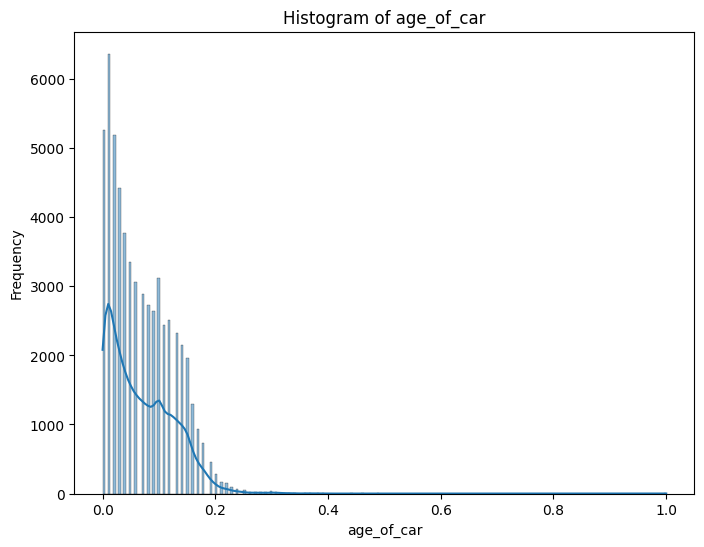

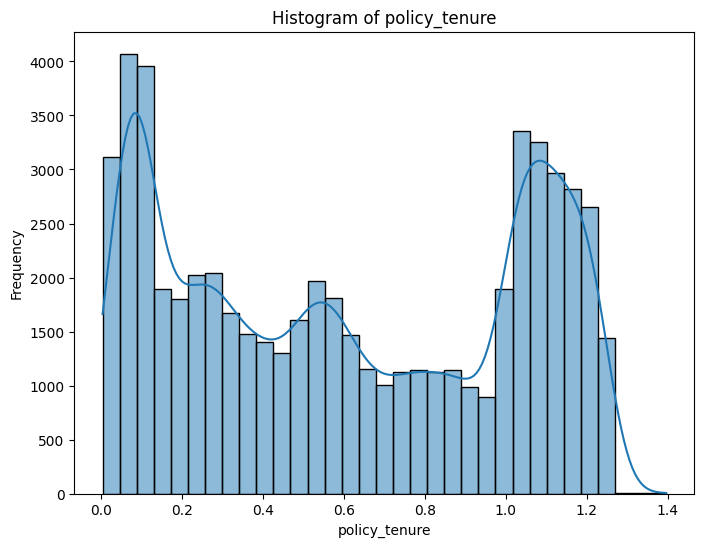

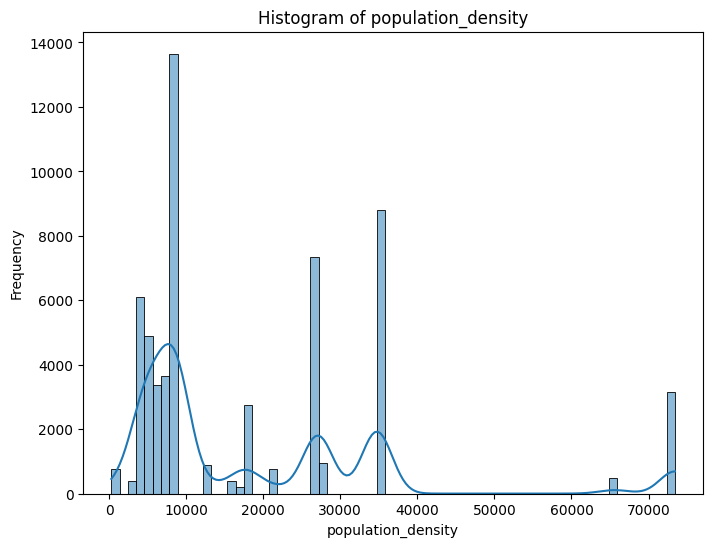

In [30]:
plot_histogram(df_copy, 'age_of_car')
plot_histogram(df_copy, 'policy_tenure')
plot_histogram(df_copy, 'population_density')

/tmp/ipykernel_17850/215999743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
/tmp/ipykernel_17850/215999743.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)


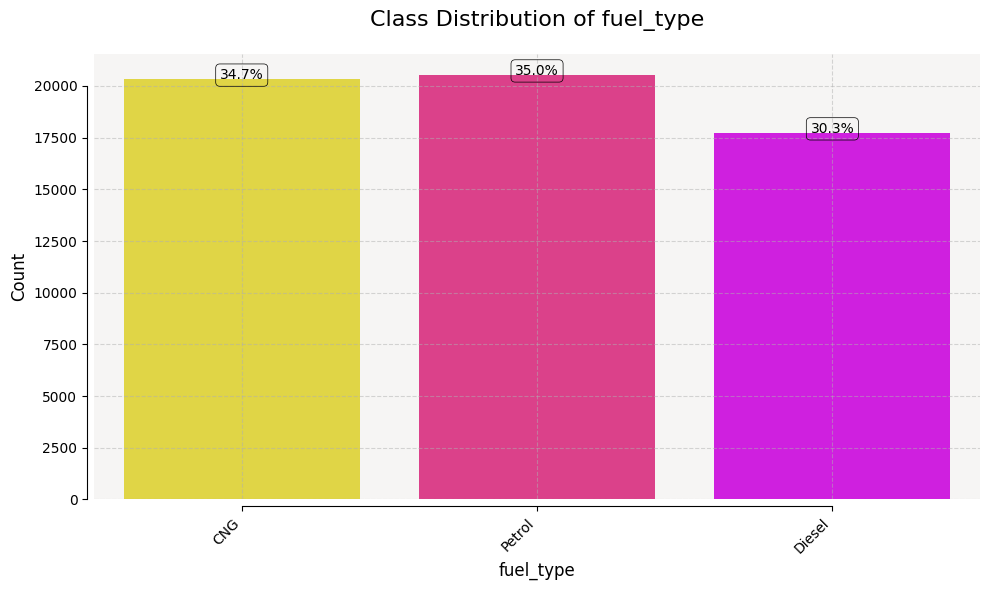

In [31]:
#Count plot for fuel_type
create_count_plot(df_copy, x_col='fuel_type', hue_col=None, title='Class Distribution of fuel_type')

/tmp/ipykernel_17850/215999743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
/tmp/ipykernel_17850/215999743.py:7: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)


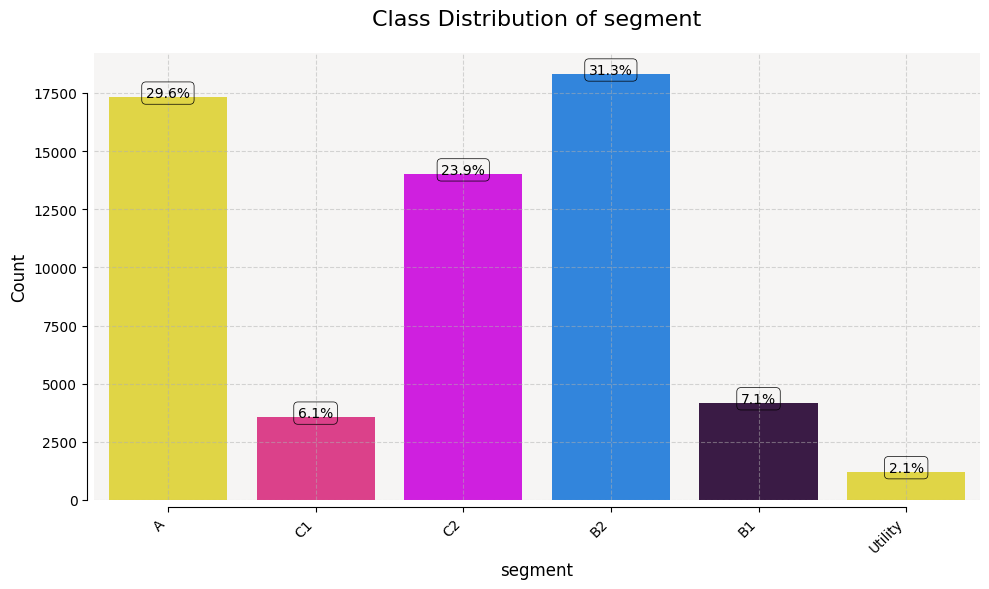

In [32]:
#count plot for segment
create_count_plot(df_copy, x_col='segment', hue_col=None, title='Class Distribution of segment')

/tmp/ipykernel_17850/215999743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
/tmp/ipykernel_17850/215999743.py:7: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)


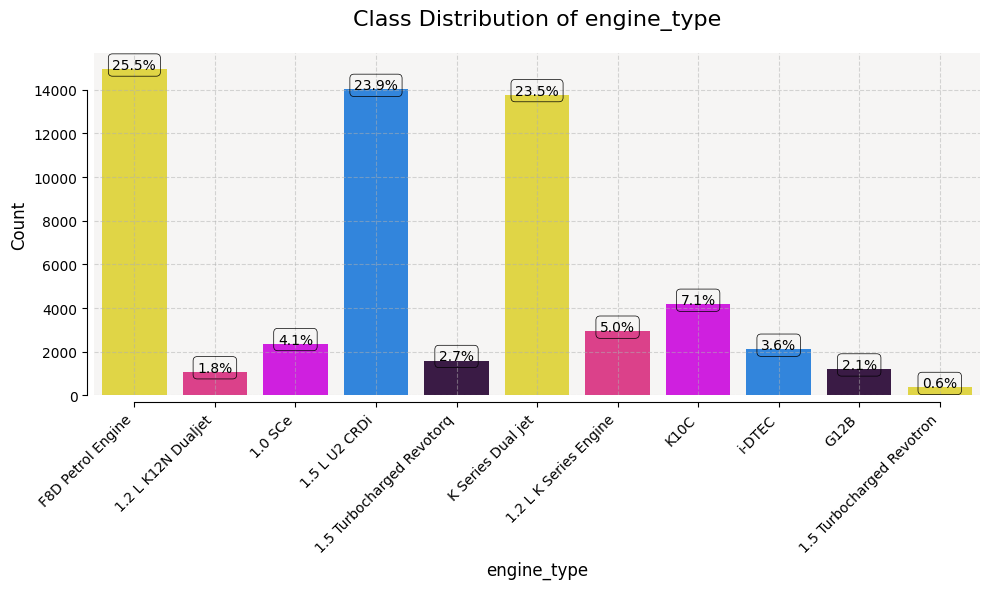

In [33]:
#count plot for engine_type
create_count_plot(df_copy, x_col='engine_type', hue_col=None, title='Class Distribution of engine_type')

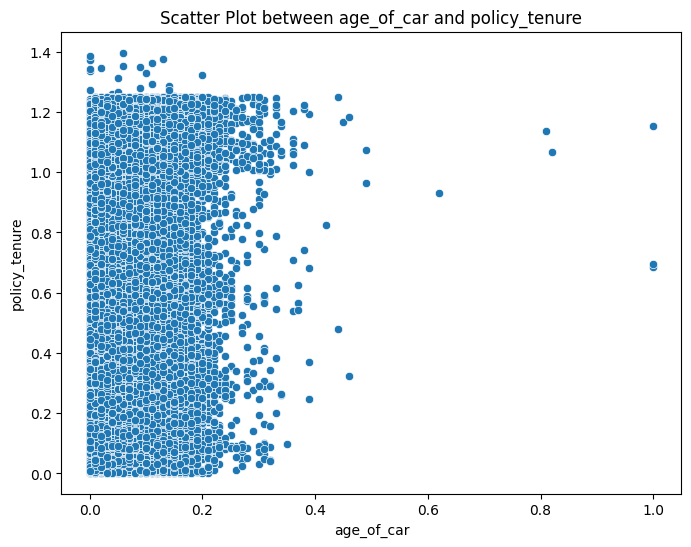

In [34]:
plot_scatter(df_copy, 'age_of_car', 'policy_tenure')

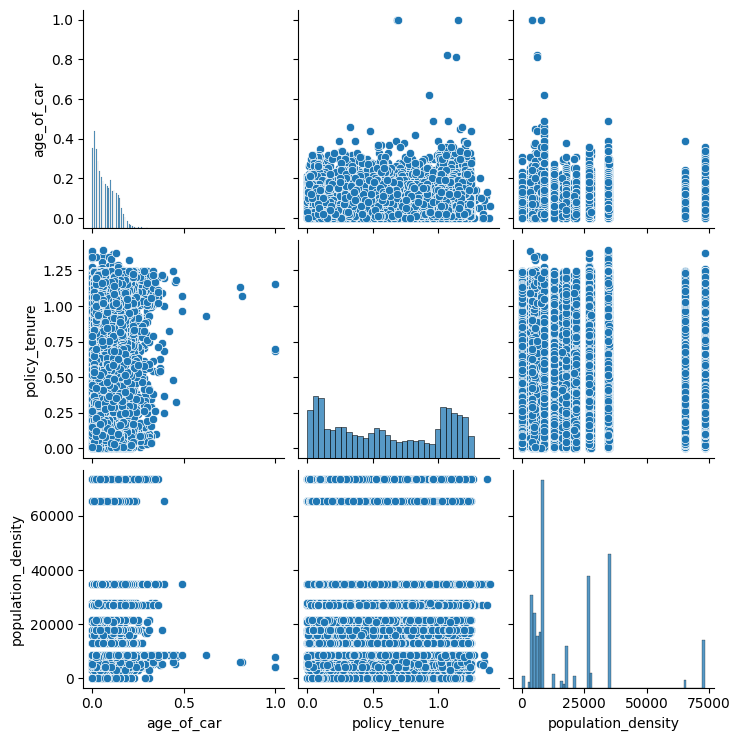

In [35]:
plot_pairplot(df_copy, ['age_of_car', 'policy_tenure', 'population_density'])

In [36]:
#drop policy_id
df_copy.drop('policy_id', axis=1, inplace=True)

In [37]:
# List of columns with "Yes" and "No" values
binary_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
    'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
    'is_ecw', 'is_speed_alert'
]

# Map "Yes" to 1 and "No" to 0 for the specified columns
for col in binary_columns:
    df_copy[col] = df_copy[col].map({'Yes': 1, 'No': 0})

In [38]:
# Identify categorical columns
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_copy, columns=categorical_cols)

# Check the resulting DataFrame
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 111 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    policy_tenure                          float64
 1    age_of_car                             float64
 2    age_of_policyholder                    float64
 3    population_density                     int64  
 4    make                                   int64  
 5    airbags                                int64  
 6    is_esc                                 int64  
 7    is_adjustable_steering                 int64  
 8    is_tpms                                int64  
 9    is_parking_sensors                     int64  
 10   is_parking_camera                      int64  
 11   displacement                           int64  
 12   cylinder                               int64  
 13   gear_box                               int64  
 14   turning_radius                      

In [39]:
#Check for null values
df_copy.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [40]:
# Check the data
df_encoded.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,F

In [41]:
# Separate the features (X) and target variable (y)
X = df_encoded.drop('is_claim', axis=1)  #'is_claim' is the target variable
y = df_encoded['is_claim']

In [42]:
# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [43]:
# Apply SMOTE to your data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [44]:
#Check target variable distribution
y_resampled.value_counts()

is_claim
0    54844
1    54844
Name: count, dtype: int64

/tmp/ipykernel_17850/215999743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
/tmp/ipykernel_17850/215999743.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)


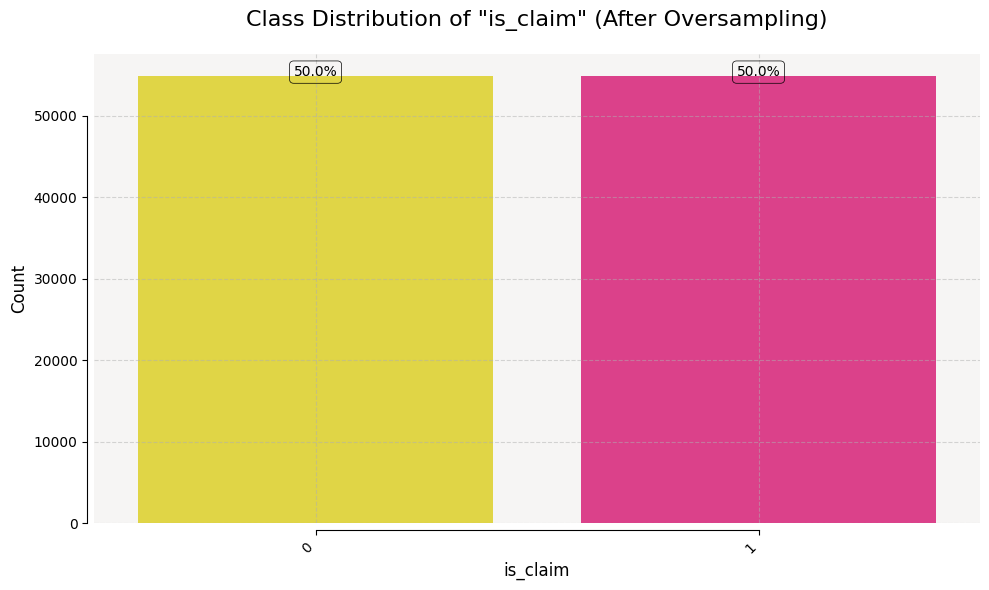

In [45]:
# Count plot for target variable after oversampling
create_count_plot(pd.DataFrame({'is_claim': y_resampled}), x_col='is_claim', hue_col=None, title='Class Distribution of "is_claim" (After Oversampling)')

In [46]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Check for null valeus again
df_encoded.isnull().sum()

policy_tenure                            0
age_of_car                               0
age_of_policyholder                      0
population_density                       0
make                                     0
airbags                                  0
is_esc                                   0
is_adjustable_steering                   0
is_tpms                                  0
is_parking_sensors                       0
is_parking_camera                        0
displacement                             0
cylinder                                 0
gear_box                                 0
turning_radius                           0
length                                   0
width                                    0
height                                   0
gross_weight                             0
is_front_fog_lights                      0
is_rear_window_wiper                     0
is_rear_window_washer                    0
is_rear_window_defogger                  0
is_brake_as

In [47]:
# Splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [48]:
# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87750, 110)
X_test shape: (21938, 110)
y_train shape: (87750,)
y_test shape: (21938,)


In [49]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

#Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9061445892971101
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11092
           1       0.90      0.91      0.91     10846

    accuracy                           0.91     21938
   macro avg       0.91      0.91      0.91     21938
weighted avg       0.91      0.91      0.91     21938

Confusion Matrix:
[[9961 1131]
 [ 928 9918]]


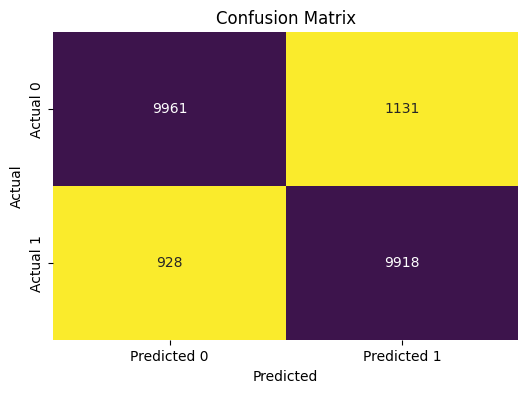

In [50]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=neon_palette, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()